# 실습 1.

### 2022년 8월 세종대역 시간대별 승하차 인원 정보
https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

#### 1. 라이브러리 import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. csv 파일 불러오기
###### read_csv 사용 시 'UnicodeDecodeError' 인코딩 오류 해결
➡ read_csv()에 encoding='CP949' 옵션 추가

In [71]:
df = pd.read_csv('서울시_지하철_호선별_역별_시간대별_승하차_인원_정보.csv', encoding='CP949')
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202208,1호선,동대문,561,16,9859,1842,8375,6305,13390,...,7319,292,1711,0,144,0,0,0,0,20220903
1,202208,1호선,동묘앞,145,1,2799,1039,3456,4571,5920,...,3281,97,1297,2,270,0,0,0,0,20220903
2,202208,1호선,서울역,573,19,8638,8274,12332,45706,39560,...,12503,2017,2148,0,208,0,1,0,0,20220903
3,202208,1호선,시청,39,0,2005,4665,3404,23606,6430,...,2631,320,688,2,7,0,0,0,0,20220903
4,202208,1호선,신설동,309,22,8586,2260,8758,9028,18458,...,7257,294,1806,0,7,0,0,0,0,20220903


#### 3. 2022년 8월 7호선 어린이대공원역의 데이터 추출

In [72]:
sejong_univ_station = df.loc[(df['사용월'] == 202208) & (df['지하철역'] == '어린이대공원(세종대)')]

# 8월 시간대별로 추출
sejong_univ_station = sejong_univ_station.iloc[: , 3:-1]
sejong_univ_station

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
248,3,0,3299,898,7572,7754,19227,15131,32560,46417,...,6695,10026,1035,2689,0,9,0,0,0,0


#### 4. 선 그래프에 사용될 데이터 정리하기

In [73]:
# 8월 시간대별 승차 인원 추출
sejong_univ_station_on = sejong_univ_station.filter(regex='승차인원')
sejong_univ_station_on

# DataFrame -> List로 변환
on_list = sejong_univ_station_on.iloc[0].to_list()
on_list

[3,
 3299,
 7572,
 19227,
 32560,
 23765,
 14138,
 13421,
 17063,
 17127,
 17843,
 22296,
 27167,
 37565,
 40634,
 21410,
 15914,
 17761,
 14535,
 6695,
 1035,
 0,
 0,
 0]

In [74]:
# 8월 시간대별 하차 인원 추출
sejong_univ_station_off = sejong_univ_station.filter(regex='하차인원')
sejong_univ_station_off

# DataFrame -> List로 변환
off_list = sejong_univ_station_off.iloc[0].to_list()
off_list

[0,
 898,
 7754,
 15131,
 46417,
 31905,
 21613,
 17667,
 19682,
 20670,
 17438,
 18038,
 19056,
 23232,
 32624,
 23964,
 14508,
 12842,
 13874,
 10026,
 2689,
 9,
 0,
 0]

In [75]:
# x축 시간 구간 추출
time_intervals = sejong_univ_station_off.columns.values.tolist()

for i in time_intervals:
    index = time_intervals.index(i)
    time_intervals[index] = time_intervals[index][0:2] + time_intervals[index][3] + time_intervals[index][4:6]

time_intervals

['04-05',
 '05-06',
 '06-07',
 '07-08',
 '08-09',
 '09-10',
 '10-11',
 '11-12',
 '12-13',
 '13-14',
 '14-15',
 '15-16',
 '16-17',
 '17-18',
 '18-19',
 '19-20',
 '20-21',
 '21-22',
 '22-23',
 '23-24',
 '00-01',
 '01-02',
 '02-03',
 '03-04']

#### 5. 그래프 그리기

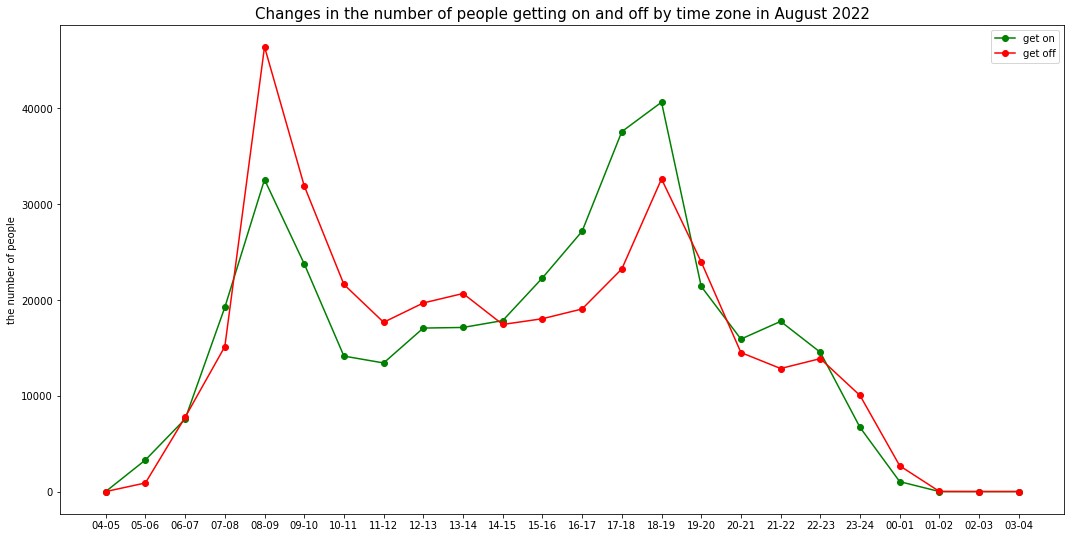

In [76]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(1, 1, 1)

# x축에 시간, y축에 인구수가 있는 선 그래프 만들기
plt.plot(range(24), on_list, color='green', marker='o', linestyle='solid', label='get on')
plt.plot(range(24), off_list, color='red', marker='o', linestyle='solid', label='get off')

plt.xticks(range(24), time_intervals)

plt.title("Changes in the number of people getting on and off by time zone in August 2022", fontsize=15)
plt.ylabel("the number of people")

plt.legend()
plt.show()



<br/>

# 실습 2.  실습 3.

### 2022년 1월부터 6월까지 서울시 공공자전거 신규가입자 정보

# 실습 2. 2022년 5월 서울시 공공자전거 신규가입자 성별 및 연령대  비교
http://data.seoul.go.kr/dataList/OA-15241/S/1/datasetView.do

#### 1. 라이브러리 import

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. csv 파일 불러오기

In [77]:
df = pd.read_csv('서울특별시_공공자전거_신규가입자_정보(월별)_22.01_22.06.csv', encoding='CP949')
df.head()

,가입일시,사용자코드,연령대코드,성별,가입 수
0,202201,회원-내국인,10대,F,112
1,202201,회원-내국인,10대,F,997
2,202201,회원-내국인,10대,M,89
3,202201,회원-내국인,10대,M,1264
4,202201,회원-내국인,20대,F,198


#### 3. 남성과 여성 데이터 추출

In [29]:
# 5월 10대 남성 신규 가입자
male_10_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('10대')) & (df['성별'] == 'M')]
male_10 = male_10_df['가입 수'].sum(axis=0)
print("5월 10대 남성 신규 가입자:", male_10)

# 5월 20대 남성 신규 가입자
male_20_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('20대')) & (df['성별'] == 'M')]
male_20 = male_20_df['가입 수'].sum(axis=0)
print("5월 20대 남성 신규 가입자:", male_20)

# 5월 30대 남성 신규 가입자
male_30_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('30대')) & (df['성별'] == 'M')]
male_30 = male_30_df['가입 수'].sum(axis=0)
print("5월 30대 남성 신규 가입자:", male_30)

# 5월 40대 남성 신규 가입자
male_40_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('40대')) & (df['성별'] == 'M')]
male_40 = male_40_df['가입 수'].sum(axis=0)
print("5월 40대 남성 신규 가입자:", male_40)

# 5월 50대 남성 신규 가입자
male_50_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('50대')) & (df['성별'] == 'M')]
male_50 = male_50_df['가입 수'].sum(axis=0)
print("5월 50대 남성 신규 가입자:", male_50)

# 5월 60대 남성 신규 가입자
male_60_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('60대')) & (df['성별'] == 'M')]
male_60 = male_60_df['가입 수'].sum(axis=0)
print("5월 60대 남성 신규 가입자:", male_60)

# 5월 70대이상 남성 신규 가입자
male_70_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('70대이상')) & (df['성별'] == 'M')]
male_70 = male_70_df['가입 수'].sum(axis=0)
print("5월 70대이상 남성 신규 가입자:", male_70)

male = [male_10, male_20, male_30, male_40, male_50, male_60, male_70]
male

5월 10대 남성 신규 가입자: 8554
5월 20대 남성 신규 가입자: 18926
5월 30대 남성 신규 가입자: 11753
5월 40대 남성 신규 가입자: 7369
5월 50대 남성 신규 가입자: 3826
5월 60대 남성 신규 가입자: 1242
5월 70대이상 남성 신규 가입자: 232


[8554, 18926, 11753, 7369, 3826, 1242, 232]

In [31]:
# 5월 10대 여성 신규 가입자
female_10_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('10대')) & (df['성별'] == 'F')]
female_10 = female_10_df['가입 수'].sum(axis=0)
print("5월 10대 여성 신규 가입자:", female_10)

# 5월 20대 여성 신규 가입자
female_20_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('20대')) & (df['성별'] == 'F')]
female_20 = female_20_df['가입 수'].sum(axis=0)
print("5월 20대 여성 신규 가입자:", female_20)

# 5월 30대 여성 신규 가입자
female_30_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('30대')) & (df['성별'] == 'F')]
female_30 = female_30_df['가입 수'].sum(axis=0)
print("5월 30대 여성 신규 가입자:", female_30)

# 5월 40대 여성 신규 가입자
female_40_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('40대')) & (df['성별'] == 'F')]
female_40 = female_40_df['가입 수'].sum(axis=0)
print("5월 40대 여성 신규 가입자:", female_40)

# 5월 50대 여성 신규 가입자
female_50_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('50대')) & (df['성별'] == 'F')]
female_50 = female_50_df['가입 수'].sum(axis=0)
print("5월 50대 여성 신규 가입자:", female_50)

# 5월 60대 여성 신규 가입자
female_60_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('60대')) & (df['성별'] == 'F')]
female_60 = female_60_df['가입 수'].sum(axis=0)
print("5월 60대 여성 신규 가입자:", female_60)

# 5월 70대이상 여성 신규 가입자
female_70_df = df[(df['가입일시'] == 202205) & (df['연령대코드'].str.contains('70대이상')) & (df['성별'] == 'F')]
female_70 = female_70_df['가입 수'].sum(axis=0)
print("5월 70대이상 여성 신규 가입자:", female_70)

female = [female_10, female_20, female_30, female_40, female_50, female_60, female_70]
female

5월 10대 여성 신규 가입자: 7184
5월 20대 여성 신규 가입자: 19893
5월 30대 여성 신규 가입자: 9337
5월 40대 여성 신규 가입자: 5962
5월 50대 여성 신규 가입자: 3117
5월 60대 여성 신규 가입자: 779
5월 70대이상 여성 신규 가입자: 126


[7184, 19893, 9337, 5962, 3117, 779, 126]

#### 4. 그래프 그리기

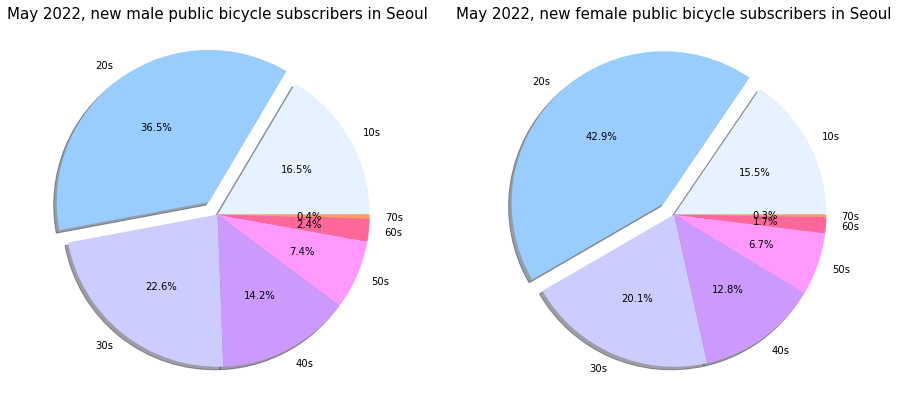

In [34]:
classes = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
explode = [0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0]
colors = ['#e6f2ff','#99ccff','#ccccff','#cc99ff','#ff99ff','#ff6699','#ff9966']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

ax1.pie(male, explode=explode, autopct='%1.1f%%', colors=colors, shadow=True, labels=classes)
ax1.set_title("May 2022, new male public bicycle subscribers in Seoul", fontsize=15)

ax2.pie(female, explode=explode, autopct='%1.1f%%', colors=colors, shadow=True, labels=classes)
ax2.set_title("May 2022, new female public bicycle subscribers in Seoul", fontsize=15)


plt.show()

# 실습 3. 2022년 1월부터 6월까지 서울시 공공자전거 신규가입자 월별 비교

#### 3. 월별 신규가입자 추출

In [78]:
# 월별 신규 가입자 추출
male = df[df['성별'] == 'M'].groupby('가입일시')['가입 수'].sum().tolist()
female = df[df['성별'] == 'F'].groupby('가입일시')['가입 수']. sum().tolist()

# # 가입일시
sub_date = df['가입일시'].unique().tolist()

print("월별 신규 남성 가입자 수:", male)
print("월별 신규 여성 가입자 수:", female)

월별 신규 남성 가입자 수: [7269, 9472, 21149, 46622, 51993, 37867]
월별 신규 여성 가입자 수: [5589, 8215, 20041, 45287, 46793, 30473]


#### 4. 그래프 그리기

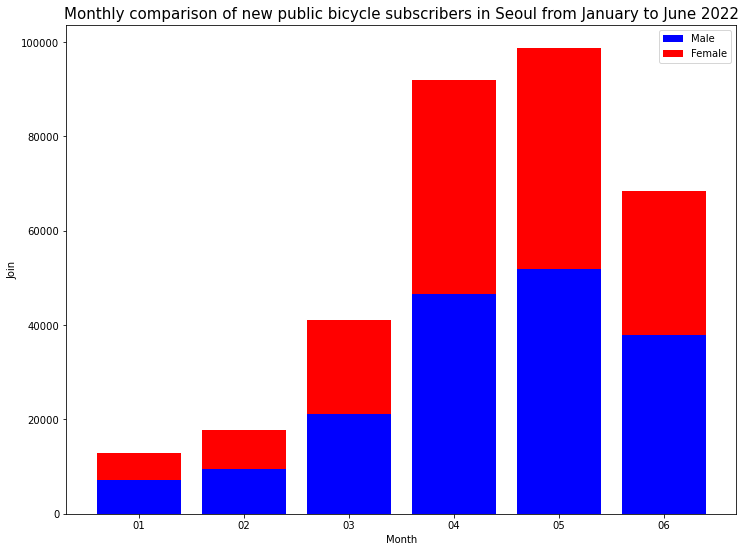

In [80]:
fig = plt.figure(figsize=(12,9))

label = ['01', '02', '03', '04', '05', '06']

plt.bar(label, male, color='b')
plt.bar(label, female, bottom=male, color='r')

plt.xlabel("Month")
plt.ylabel("Join")
plt.legend(['Male', 'Female'])
plt.title("Monthly comparison of new public bicycle subscribers in Seoul from January to June 2022", fontsize=15)

plt.show()

<br/>

# 실습 4.

### 2022년 1월부터 8월까지 광진구, 노원구, 강남구 코로나19 추가 확진자 발생 동향

http://data.seoul.go.kr/dataList/OA-20470/S/1/datasetView.do

#### 1. 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. csv 파일 불러오기

In [83]:
df = pd.read_csv('서울시_코로나19_자치구별_확진자_발생동향.csv', encoding='CP949')
df.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.09.19.00,63793,39,57613,37,99122,53,137131,69,166801,...,189421,134,243796,170,311011,170,217173,174,293058,164
1,2022.09.18.00,63754,68,57576,70,99069,104,137062,142,166691,...,189287,241,243626,271,310841,341,216999,292,292894,274
2,2022.09.17.00,63686,107,57506,86,98965,151,136920,204,166471,...,189046,245,243355,296,310500,485,216707,340,292620,498
3,2022.09.16.00,63579,146,57420,105,98814,172,136717,257,166196,...,188801,329,243059,397,310015,605,216367,449,292125,588
4,2022.09.15.00,63433,163,57315,111,98642,228,136460,273,165849,...,188472,418,242662,521,309410,690,215918,496,291533,823


#### 3. 2022년 1월~8월 광진구, 노원구, 강남구 코로나 19 추가 확진자 추출

In [97]:
# 2022년 데이터 추출
df_date = df[df['자치구 기준일'].str.contains('2022')]

# 2022년 1월 ~ 8월 데이터 추출
df_date = df_date.iloc[19:]

# 데이터프레임 역순으로 변경
df_date = df_date.iloc[::-1]
df_date

# 2022년 1월 ~ 8월 날짜 슬라이싱 date = '2022.01'
date = df_date['자치구 기준일'].tolist()

for i in date:
    index = date.index(i)
    date[index] = date[index][0:7]
    
date = list(set(date))
    
# 1월 ~ 8월 슬라이싱 month = '01' 
month = sorted(date)

for i in month:
    index = month.index(i)
    month[index] = month[index][5:7]
month

['01', '02', '03', '04', '05', '06', '07', '08']

In [86]:
# 2022년 1월 ~ 8월 광진구 월별 코로나19 추가 확진자 데이터 추출 
gwangjin_gu_df = df_date[['자치구 기준일', '광진구 추가']]

# '자치구 기준일' 일-> 월로 슬라이싱 E.g) 2022.08.31.00 -> 2022.08
for i, row in gwangjin_gu_df.iterrows():
    gwangjin_gu_df.loc[i, '자치구 기준일'] = gwangjin_gu_df.loc[i, '자치구 기준일'][0:7]

gwangjin_gu = gwangjin_gu_df.groupby('자치구 기준일')['광진구 추가'].sum().tolist()
gwangjin_gu

[2080, 18407, 70726, 24442, 4745, 1656, 11048, 19866]

In [87]:
# 2022년 1월 ~ 8월 노원구 월별 코로나19 추가 확진자 데이터 추출 
nowon_gu_df = df_date[['자치구 기준일', '노원구 추가']]

# '자치구 기준일' 일-> 월로 슬라이싱 E.g) 2022.08.31.00 -> 2022.08
for i, row in nowon_gu_df.iterrows():
    nowon_gu_df.loc[i, '자치구 기준일'] = nowon_gu_df.loc[i, '자치구 기준일'][0:7]
 
nowon_gu = nowon_gu_df.groupby('자치구 기준일')['노원구 추가'].sum().tolist()
nowon_gu

[2508, 25160, 101330, 37600, 7123, 2400, 15389, 30091]

In [88]:
# 2022년 1월 ~ 8월 강남구 월별 코로나19 추가 확진자 데이터 추출 
gangnam_gu_df = df_date[['자치구 기준일', '강남구 추가']]

# '자치구 기준일' 일-> 월로 슬라이싱 E.g) 2022.08.31.00 -> 2022.08
for i, row in nowon_gu_df.iterrows():
    gangnam_gu_df.loc[i, '자치구 기준일'] = gangnam_gu_df.loc[i, '자치구 기준일'][0:7]
 
gangnam_gu = gangnam_gu_df.groupby('자치구 기준일')['강남구 추가'].sum().tolist()
gangnam_gu

[3463, 26972, 96036, 36346, 8064, 3621, 18795, 29248]

#### 4. 그래프 그리기

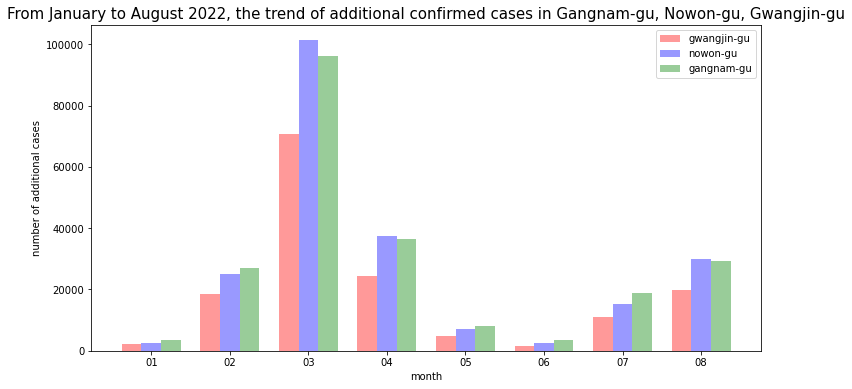

In [98]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 월이 8개이므로 0, 1, ~ 7의 위치를 기준으로 삼음
index = np.arange(8)

# 각 자치구별로 3개의 확진자 수의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, gwangjin_gu, bar_width, alpha=0.4, color='red', label='gwangjin-gu')

b2 = plt.bar(index + bar_width, nowon_gu, bar_width, alpha=0.4, color='blue', label='nowon-gu')

b3 = plt.bar(index + 2 * bar_width, gangnam_gu, bar_width, alpha=0.4, color='green', label='gangnam-gu')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 month 정보와 매칭
plt.xticks(np.arange(bar_width, 8 + bar_width, 1), month)

# x축, y축 이름 설정
plt.xlabel('month')
plt.ylabel('number of additional cases')
plt.title('From January to August 2022, the trend of additional confirmed cases in Gangnam-gu, Nowon-gu, Gwangjin-gu', fontsize=15)
plt.legend()
plt.show()

<br/>

# 실습 5.
### 2021년 서울시 강수량 월별 비교
https://data.seoul.go.kr/dataList/10672/S/2/datasetView.do

#### 1. 라이브러리 import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. csv 불러오기

In [100]:
df = pd.read_csv('강수량+및+강수일수_20220920013452.csv')
df.head()

,2021. 01,2021. 01.1,2021. 02,2021. 02.1,2021. 03,2021. 03.1,2021. 04,2021. 04.1,2021. 05,2021. 05.1,...,2021. 08,2021. 08.1,2021. 09,2021. 09.1,2021. 10,2021. 10.1,2021. 11,2021. 11.1,2021. 12,2021. 12.1
0,강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),...,강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일),강수량 (㎜),강수일수 (일)
1,18.9,9,7.1,5,110.9,9,124.1,9,183.1,17,...,211.2,13,131.0,8,57.0,11,62.4,6,7.9,NaN


#### 3. 강수량 및 강수일수 데이터 추출

In [101]:
# 강수량 및 강수일수 문자열 -> 숫자형 변환
df.loc[[1]] = df.loc[[1]].apply(pd.to_numeric)

In [102]:
# 날짜
month = list(df.iloc[:, ::2])
for i in month:
    index = month.index(i)
    month[index] = month[index][6:9]


# 강수량
precipitation_df = df.iloc[:, ::2]
precipitation = precipitation_df.loc[1].tolist()

# 강수일수
precipitation_days_df = df.iloc[:, 1::2]
precipitation_days = precipitation_days_df.loc[1].tolist()

precipitation_days

[9.0, 5.0, 9.0, 9.0, 17.0, 13.0, 8.0, 13.0, 8.0, 11.0, 6.0, nan]

#### 4. 그래프 그리기

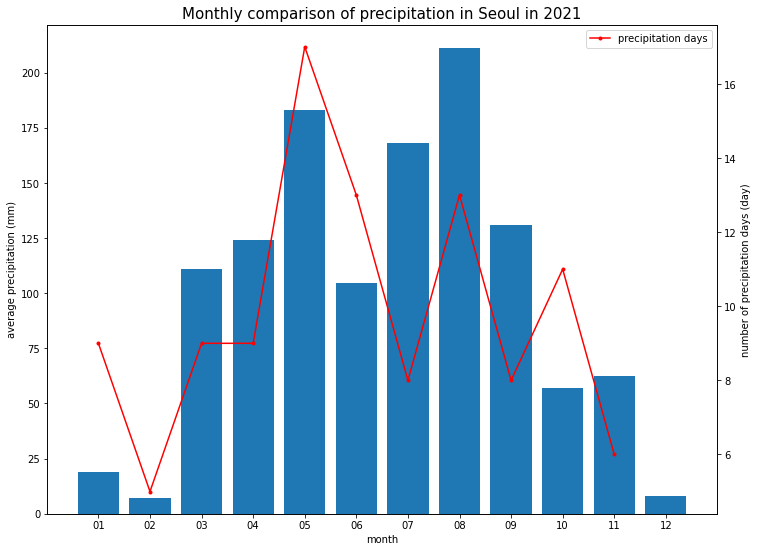

In [103]:
fig = plt.figure(figsize=(12,9))

index = np.arange(12)

plt.bar(index, precipitation, tick_label=month, align='center', label='precipitation')

plt.xlabel('month')
plt.ylabel('average precipitation (mm)')

plt.twinx()
plt.plot(index, precipitation_days, 'r.-', label='precipitation days')
plt.ylabel('number of precipitation days (day)')
plt.legend()

plt.title('Monthly comparison of precipitation in Seoul in 2021', fontsize=15)

plt.show()